# Filling scheme from Timber
This example shows how to compute the dissipated power for an LHC fillNumber.
The filling scheme and the bunch parameters are obtained from a fill number through Timber.
The impedance curve used is from a generic Pillbox cavity simulated with CST studio exported in txt.
\
Last tested in SWAN with 102b NXCALS PRO.

In [1]:
import bihc

Elaborating Data...


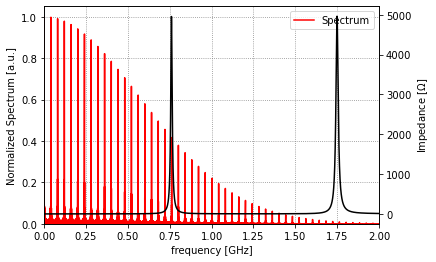

Beam 6675 power loss: 689.4640179218724 W


In [3]:
# Data retrival from timber, with different bunch profile shapes

# In short
# b_6675 = bihc.Beam(fillNumber=6675, bunchShape='GAUSSIAN')

b_6675 = bihc.Beam(M=3564, A=1, fillNumber=6675,
                    bunchLength=1.2e-9, phi=0, realMachineLength=True,
                    ppbk=250, t0=None, Np=2.3e11, bunchShape='GAUSSIAN', LPCfile=None, qvalue=1.2, beamNumber=1, 
                    fillMode='FLATTOP', fillingScheme=[False]*3564, machine='LHC', spectrum='numeric', frev=None, 
                    fmax=2e9, exp=2.5, verbose=False)

# Exporting frequency array, needed for the impedance curve
[f, S] = b_6675.spectrum

# Importing an impedance curve
impedance_file = 'PillboxImpedance.txt'

Z = bihc.Impedance(f)
Z.getImpedanceFromCST(impedance_file)

# built-in plot spectrum and normalized impedance
b_6675.plotSpectrumAndImpedance(Z)

# Computing the dissipated power value
print(f'Beam 6675 power loss: {b_6675.getPloss(Z)[0]} W')